In [84]:
import pandas as pd
import dataframe_image as dfi
%load_ext autoreload
%autoreload 2

from sklearn.model_selection import train_test_split
import data_generation as dg
from metrics import true_ece
import scipy.stats as st
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [85]:
dist1_1 = st.multivariate_normal(mean=[10, 10], cov=1, allow_singular=True)
dist1_2 = st.multivariate_normal(mean=[6, 6], cov=1.7, allow_singular=True)

In [86]:
dist2_1 = st.multivariate_normal(mean=[10, 10], cov=1, allow_singular=True)
dist2_2 = st.multivariate_normal(mean=[6, 6], cov=1.7, allow_singular=True)

In [87]:
class_object1 = dg.ClassObject([dist1_1, dist1_2], None)
class_object2 = dg.ClassObject([dist2_1, dist2_2], None)

In [88]:
test = dg.DataGeneration([class_object1, class_object2], n_uninformative_features=0, title="dg-test")

In [89]:
n_samples_per_class_and_dist = 1000

samples, labels = test.generate_data(n_samples_per_class_and_dist)

<module 'matplotlib.pyplot' from 'D:\\ProgrammingProjects\\PyCharm\\venv\\lib\\site-packages\\matplotlib\\pyplot.py'>

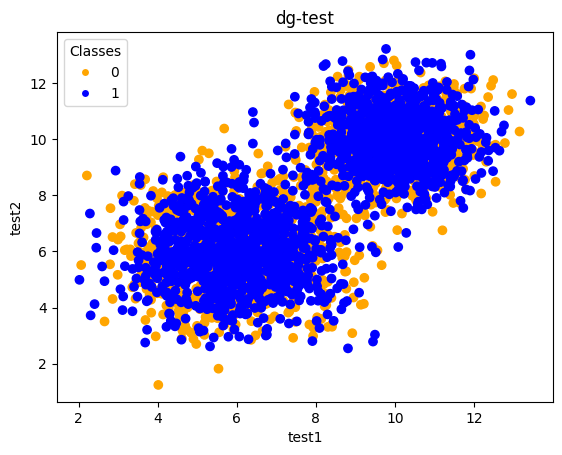

In [90]:
colormap = np.array(['orange', 'blue', 'red'])

test.scatter2d(0, 1, colormap=colormap, savePath="./plots/balanced_hard_dichotomy_few_features", axis1_label="test1", axis2_label="test2")

In [91]:
X_train, X_test, y_train, y_test = train_test_split(samples, labels, test_size=.3)

In [92]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [93]:
model = tf.keras.Sequential()

In [94]:
model.add(tf.keras.layers.Dense(50, activation="tanh"))

In [95]:
model.add(tf.keras.layers.Dense(2,activation="softmax"))

In [96]:
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [97]:
model.fit(X_train.reshape(-1, 2), y_train, epochs=15, batch_size=1000)

Epoch 1/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5094 - loss: 0.8995  
Epoch 2/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5056 - loss: 0.7446 
Epoch 3/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5023 - loss: 0.7063 
Epoch 4/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5016 - loss: 0.6974 
Epoch 5/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5207 - loss: 0.6938 
Epoch 6/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5262 - loss: 0.6924 
Epoch 7/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5139 - loss: 0.6929 
Epoch 8/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5210 - loss: 0.6927 
Epoch 9/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5088 - loss: 0.6937 
Epoch 10/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5052 - loss: 0.6928 
Epoch 11/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5163 - loss: 0.6927 
Epoch 12/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5240 - loss: 0.6925 


In [98]:
model.evaluate(X_test.reshape(-1, 2), y_test)

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step - accuracy: 0.4851 - loss: 0.6945


[0.694603443145752, 0.5024999976158142]

In [99]:
predictions = model.predict(X_test.reshape(-1,2))

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [100]:
y_test = np.argmax(y_test, axis=1)

In [101]:
p_test_true = np.array([[test.cond_prob(x, k=0), test.cond_prob(x, k=1)] for x in X_test])

In [110]:
not_binned_df, binned_df = true_ece.print_calibration_error_summary_table(predictions, y_test, p_test_true, n_bins=np.array([10, 20, 50, 100]))

   true ece  balance score  balance score ABS    ksce
0  0.016302        -0.0138             0.0138  0.0153
   number of bins     ece    fce  tce (uniform, normalized)  \
0              10  0.0138  0.015                   0.050000   
1              20  0.0138  0.015                   0.010833   
2              50  0.0162  0.016                   0.082500   
3             100  0.0230  0.024                   0.044167   

   tce (pava-bc, normalized)     ace  
0                   0.063333  0.0206  
1                   0.063333  0.0206  
2                   0.063333  0.0206  
3                   0.063333  0.0230  


In [111]:
display(not_binned_df)
display(binned_df)

,true ece,balance score,balance score ABS,ksce
0,0.016302,-0.0138,0.0138,0.0153


,number of bins,ece,fce,"tce (uniform, normalized)","tce (pava-bc, normalized)",ace
0,10,0.0138,0.015,0.050000,0.063333,0.0206
1,20,0.0138,0.015,0.010833,0.063333,0.0206
2,50,0.0162,0.016,0.082500,0.063333,0.0206
3,100,0.0230,0.024,0.044167,0.063333,0.0230


In [109]:
# dfi.export(pd.concat([binned_df, not_binned_df]), "./tables/balanced_hard_dichotomy_few_features") // not yet working bc of FileNotFoundError

FileNotFoundError: [WinError 2] The system cannot find the file specified